In [1]:
import csv
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
a_train = os.listdir('./data/training/')
b_train = os.listdir('./data/training_setB/')

In [22]:
with open('sepsis.csv', 'w') as outfile:
    writer = csv.writer(outfile, lineterminator='\n')

    for i, name in enumerate(a_train):
        with open(f'./data/training/{name}','r') as infile:
            reader = csv.reader(infile, delimiter='|')
            all = []

            # ignore header
            if i == 0:
                row = next(reader)
                row.append('Patient_id')
                row.append('time')
                all.append(row)
            else:
                row = next(reader)

            for j, row in enumerate(reader):
                row.append(i)
                row.append(j)
                all.append(row)

            writer.writerows(all)
 

    num = i 


    for i, name in enumerate(b_train):
        if i < 10000:
            num = num + 1

        with open(f'./data/training_setB/{name}', 'r') as infile:
            all = []
            reader = csv.reader(infile, delimiter='|')
            row = next(reader)

            for j, row in enumerate(reader):
                row.append(num)
                row.append(j)
                all.append(row)

            writer.writerows(all)

In [46]:
df = pd.read_csv('sepsis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1398811 non-null  float64
 1   O2Sat             1349474 non-null  float64
 2   Temp              525226 non-null   float64
 3   SBP               1325945 non-null  float64
 4   MAP               1358940 non-null  float64
 5   DBP               1065656 non-null  float64
 6   Resp              1313875 non-null  float64
 7   EtCO2             57636 non-null    float64
 8   BaseExcess        84145 non-null    float64
 9   HCO3              65028 non-null    float64
 10  FiO2              129365 non-null   float64
 11  pH                107573 non-null   float64
 12  PaCO2             86301 non-null    float64
 13  SaO2              53561 non-null    float64
 14  AST               25183 non-null    float64
 15  BUN               106568 non-null   float64
 16  

In [6]:
df.corr()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
HR,1.000000,-0.075651,0.258901,-0.033710,0.069777,0.129359,0.225994,0.022541,-0.091367,-0.092121,0.003951,-0.099816,0.025316,-0.010731,0.057342,-0.026600,0.052136,-0.096124,0.013944,-0.018583,0.029377,0.083638,0.144732,-0.064527,-0.046569,0.011283,0.020794,0.004661,-0.080780,-0.080519,0.010539,0.132349,0.075185,0.026032,-0.157255,-0.030851,0.004839,-0.004839,-0.054158,0.045364,0.048987,-0.020358,0.044533
O2Sat,-0.075651,1.000000,-0.030200,0.024909,0.025553,0.000781,-0.147493,-0.000717,0.032439,-0.060749,-0.000718,0.113346,-0.118199,0.103225,-0.015069,-0.045027,-0.019155,-0.039468,0.159186,-0.013803,0.000818,-0.027914,-0.171145,-0.024578,-0.048736,-0.023149,-0.016952,-0.003145,-0.118928,-0.102113,-0.072531,-0.026618,-0.074449,-0.024119,-0.049195,-0.031281,-0.045324,0.045324,-0.010307,-0.044212,-0.009338,-0.021870,-0.045524
Temp,0.258901,-0.030200,1.000000,0.002297,-0.062543,-0.106308,0.120913,0.189782,0.148492,0.079276,-0.005343,0.205643,-0.044499,-0.009446,-0.005762,-0.117759,-0.037242,0.010313,-0.044178,-0.083493,-0.026788,-0.071153,-0.226805,-0.048120,-0.151926,0.053308,-0.025180,0.014465,-0.042781,-0.034831,-0.113904,0.037158,0.255690,0.000458,-0.070971,0.052945,-0.220159,0.220159,0.001161,0.085427,0.048160,-0.055763,0.081866
SBP,-0.033710,0.024909,0.002297,1.000000,0.780469,0.539739,0.045887,0.089038,0.151232,0.058078,-0.004606,0.122648,0.010828,0.106002,-0.000888,0.004796,-0.029192,0.044330,-0.038788,0.078706,-0.046880,0.046277,-0.125400,-0.026840,-0.026842,-0.095344,-0.029644,-0.104515,0.094496,0.075699,-0.102243,-0.038851,0.049514,0.026491,0.024524,-0.015066,0.056946,-0.056946,0.034819,0.056302,-0.013375,0.107559,0.059146
MAP,0.069777,0.025553,-0.062543,0.780469,1.000000,0.852315,0.049081,0.082885,0.111239,0.022242,-0.004030,0.094370,0.000904,0.090122,0.009769,-0.046401,-0.019276,0.032606,-0.003850,0.063761,-0.058754,0.043360,-0.075883,-0.041072,-0.033638,-0.096383,-0.038740,-0.051024,0.177813,0.149366,-0.066753,-0.045214,0.048653,0.045086,-0.148738,0.002264,0.125495,-0.125495,0.037496,0.032628,-0.018796,0.203799,0.037530
DBP,0.129359,0.000781,-0.106308,0.539739,0.852315,1.000000,0.061883,0.070692,0.080085,0.023649,-0.002933,0.064466,0.000859,0.064662,0.008927,-0.043595,0.000041,0.067144,-0.001419,0.058837,-0.041144,0.041807,-0.042662,-0.043645,-0.029277,-0.094669,-0.029197,-0.012079,0.236447,0.208688,-0.046170,-0.052250,0.043012,0.087190,-0.265540,0.026216,0.227676,-0.227676,0.044143,0.012477,-0.017757,0.193051,0.018533
Resp,0.225994,-0.147493,0.120913,0.045887,0.049081,0.061883,1.000000,-0.159129,-0.033947,-0.041246,-0.000104,0.008307,-0.031278,-0.023562,0.024280,0.069767,0.065990,0.012642,-0.079866,0.022275,-0.010114,0.037086,0.133720,-0.005325,-0.032337,0.009578,0.012379,0.011235,0.019695,0.002802,0.059922,0.043930,0.112186,0.066271,0.032597,0.002871,0.088161,-0.088161,-0.026744,0.097983,0.046304,-0.008465,0.098785
EtCO2,0.022541,-0.000717,0.189782,0.089038,0.082885,0.070692,-0.159129,1.000000,0.163442,0.287963,-0.059345,-0.047906,0.430414,0.056739,-0.168487,-0.038846,-0.076195,0.091636,-0.041674,-0.062287,-0.117392,-0.007378,-0.294803,0.043636,0.023025,-0.042817,-0.126207,-0.008238,0.102066,0.070072,-0.180418,-0.023125,0.167812,0.176532,-0.176406,-0.032540,0.010264,-0.010264,0.006956,0.089907,-0.015416,0.003334,0.090549
BaseExcess,-0.091367,0.032439,0.148492,0.151232,0.111239,0.080085,-0.033947,0.163442,1.000000,0.856930,-0.130708,0.650621,0.352545,0.044302,-0.029664,-0.193419,-0.097413,0.199829,-0.314160,-0.235374,0.015444,-0.164158,-0.447899,-0.004636,-0.320600,-0.232639,0.043625,0.022171,-0.049356,-0.033302,-0.231371,-0.165710,0.123766,0.079221,-0.041594,0.023431,0.059337,-0.059337,-0.016268,0.154538

In [30]:
len(df)

0

In [59]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
features = [
    'time', 'ICULOS', 'HospAdmTime',
    'Gender', 'Age', 'HR', 'O2Sat',
    'SepsisLabel', 'SBP', 'MAP', 'DBP', 'Resp'  ]

train = df[features].dropna()
X = train.drop('SepsisLabel', axis=1)
y = train['SepsisLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=50)

In [57]:
y.value_counts()

0    946951
1     17404
Name: SepsisLabel, dtype: int64

In [60]:
xgbc = RandomForestClassifier()
sgdc = SGDClassifier()

xgbc.fit(X_train, y_train)

RandomForestClassifier()

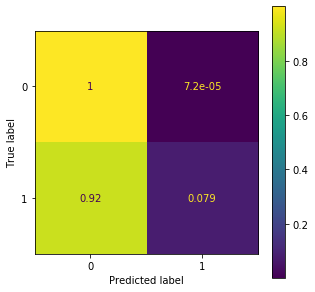

In [61]:
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = mpl.pyplot.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plot_confusion_matrix(xgbc, X_test, y_test, ax=ax, normalize='true')